In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X = np.array([[0,0],[0,1],[1,0],[1,1]]).T
Y = np.array([0,1,1,0])
Y = Y.reshape([4,1])
Y = Y.T

In [6]:
n_x = X.shape[0] # size of input layer
n_h = 2
n_y = Y.shape[0] # size of output layer


In [7]:
def visualize(X,Y):
    plt.scatter(X[0, :], X[1, :], c=Y[0], s=500)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Xor Function for two variables')
    plt.show()

In [8]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, s=50)

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [11]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [1]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] # number of example
   
    W1 = parameters['W1']
    W2 = parameters['W2']
  
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    cost = np.squeeze(cost)
    return cost

In [13]:
def backward_propagation(parameters, cache, X, Y):
  
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [14]:
def update_parameters(parameters, grads, learning_rate=1.5):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [15]:
def predict(parameters, X):
    
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [16]:
def nn_model(X, Y, num_iterations=10000, print_cost=False):
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    print('Initial Decision Boundary')
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
         
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
 
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads)
       
        if i%10000 == 0 and print_cost:
            print('Prediction after '+str(i)+' iterations')
            Y_ = predict(parameters,X)
            visualize(X,Y_)
            print ("Cost after iteration %i: %f" % (i, cost))
    print('Final Decision Boundary')
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
    return parameters

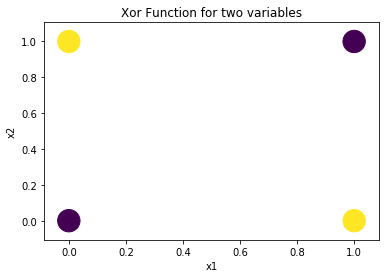

In [17]:
visualize(X,Y)

Initial Decision Boundary
Prediction after 0 iterations


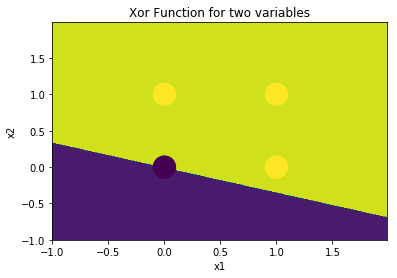

Cost after iteration 0: 0.693147
Prediction after 10000 iterations


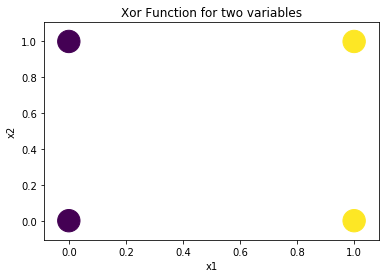

Cost after iteration 10000: 0.693147
Prediction after 20000 iterations


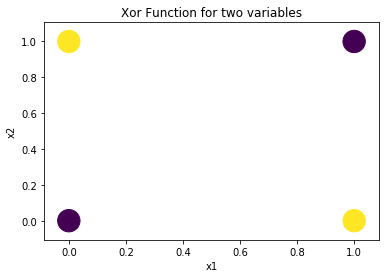

Cost after iteration 20000: 0.002081
Prediction after 30000 iterations


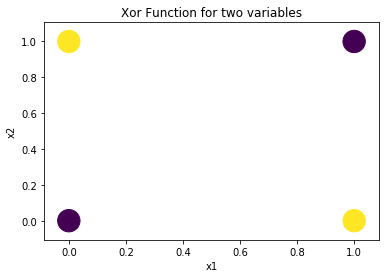

Cost after iteration 30000: 0.000184
Prediction after 40000 iterations


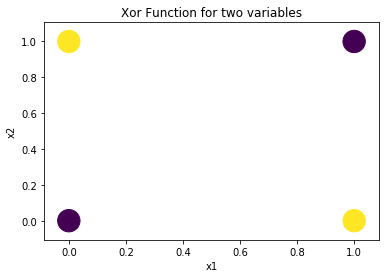

Cost after iteration 40000: 0.000096
Prediction after 50000 iterations


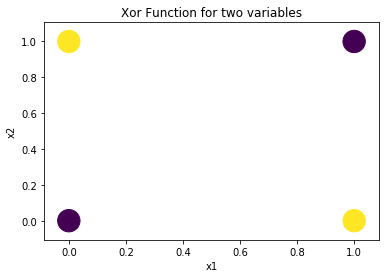

Cost after iteration 50000: 0.000065
Prediction after 60000 iterations


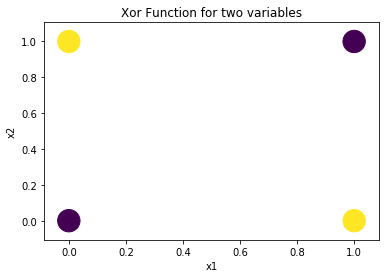

Cost after iteration 60000: 0.000049
Prediction after 70000 iterations


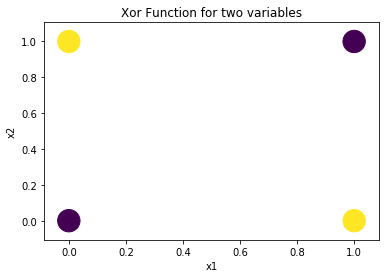

Cost after iteration 70000: 0.000040
Prediction after 80000 iterations


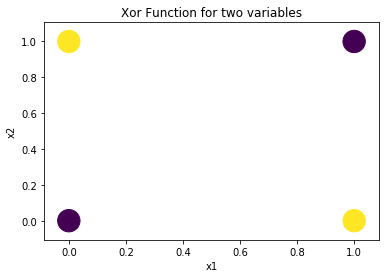

Cost after iteration 80000: 0.000033
Prediction after 90000 iterations


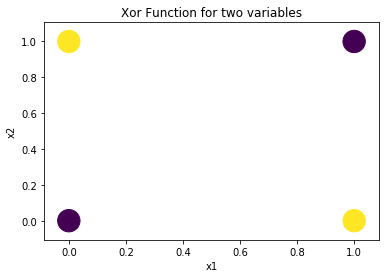

Cost after iteration 90000: 0.000028
Final Decision Boundary


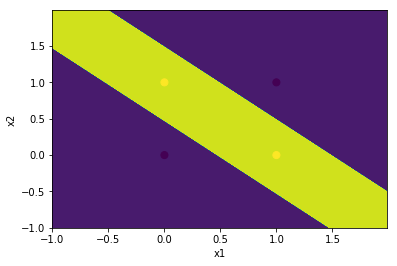

In [18]:
parameters = nn_model(X, Y, num_iterations=100000, print_cost=True)

In [19]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 100%
